---
author: "Guillermo Ruiz"
jupyter: python3
---

# El conjunto de datos California Housing

En esta actividad se trabajará con el conjunto de datos California Housing. 
Se reducirá la dimensión y luego se aplicará DBSCAN para agrupar los datos. 

Para graficar se debe usar la función `scatter` con el parámetro `cmap='Spectral'` para mostrar los colores.

Con el siguiente código se puede leer los datos.


In [10]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
import umap
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [11]:
california_housing = fetch_california_housing(as_frame=True)
df = california_housing.data
y = california_housing.target
df.shape, y.shape

((20640, 8), (20640,))

Que contiene las siguientes características:

In [12]:
print(california_housing.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Con este conjunto de datos se deberán proyectar los datos en dos dimensiones usando el precio `y` como color. Se usarán los métodos

- PCA
- UMAP

Primero veamos la descripción de los datos.

In [13]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Como tenemos las coordenadas (Longitude y Latitude), podemos poner los puntos en un mapa. 
1. Graficar los puntos usando Longitude vs Latitude en los ejes. Usar el precio `y`como color de los puntos. Note que se pueden ver las ciudades de Los Angeles, San Francisco, San Diego y Sacramento.

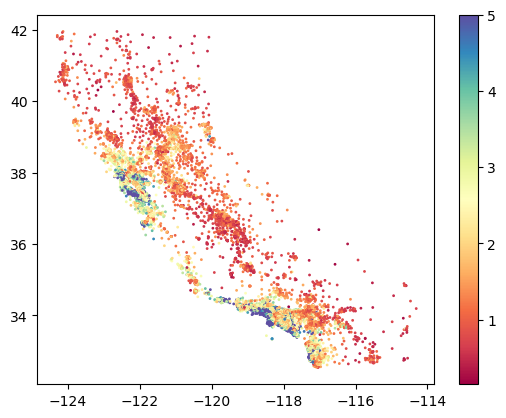

In [14]:
plt.scatter(df['Longitude'],df['Latitude'], s=1, c=y, cmap='Spectral')
plt.colorbar()
plt.show()

## PCA

2. Usar PCA para bajar las dimensiones a dos y graficar los datos usando `y` como color. Primero aplicar `StandardScaler` para estandarizar los datos (media cero y desviación estandar 1). 

In [16]:
#| echo: false
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

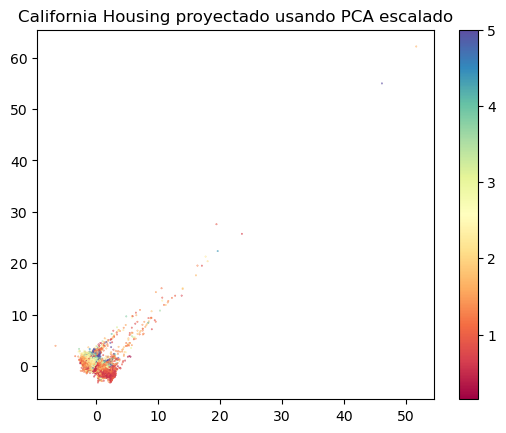

In [17]:
#| echo: false
#| output: false
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)
plt.scatter(X_pca[:, 0],
            X_pca[:, 1],
            c=y,
            s=0.1,
            cmap='Spectral')
plt.colorbar()
plt.title("California Housing proyectado usando PCA escalado")
plt.show()

Como podemos ver, se ven muy juntos los datos. 

## UMAP

3. Usar UMAP para visualizar los datos. Graficar la proyección usando `y` como color.

C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\msubr\Anaconda3\envs\c_ansyv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


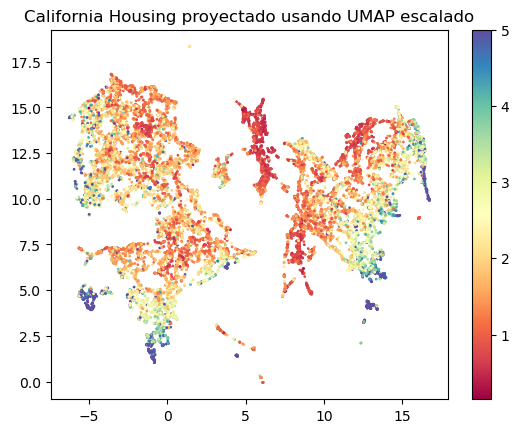

In [18]:
#| echo: false
#| output: false

reducer = umap.UMAP(n_components=2, n_neighbors=5, min_dist=.0)
reducer.fit(X_scaled)

embedding = reducer.transform(X_scaled)
plt.scatter(embedding[:, 0],
            embedding[:, 1],
            c=y,
            s=1,
            cmap='Spectral')
plt.colorbar()
plt.title("California Housing proyectado usando UMAP escalado")
plt.show()

Como podemos ver, se agrupan los datos en clusters. 

4. Usar DBSCAN para separarlos (la reducción de dimensión) y graficamos los clusters.

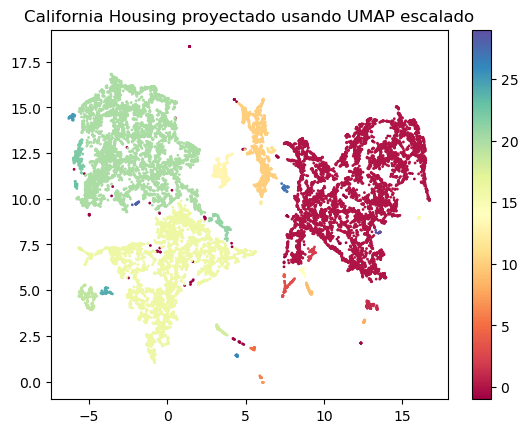

In [19]:
#| echo: false
#| output: false

dbscan = DBSCAN(eps=.25, min_samples=10)
y_c = dbscan.fit_predict(embedding)
plt.scatter(embedding[:, 0],
            embedding[:, 1],
            c=y_c,
            s=1,
            cmap='Spectral')
plt.colorbar()
plt.title("California Housing proyectado usando UMAP escalado")
plt.show()

5. Volver a poner los puntos originales en un mapa pero el color será el cluster al que pertenece.

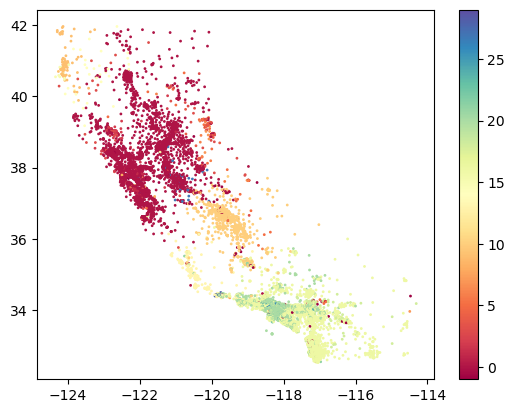

In [20]:
#| echo: false
#| output: false

plt.scatter(df['Longitude'],df['Latitude'], s=1, c=y_c, cmap='Spectral')
plt.colorbar()
plt.show()